In [543]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import prophet
import sklearn
import matplotlib
from prophet.diagnostics import cross_validation
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly

In [544]:
print("Prophet version:", prophet.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Matplotlib version:", matplotlib.__version__)

Prophet version: 1.1.5
Scikit-learn version: 1.5.2
Matplotlib version: 3.9.2


## Column Description

https://www.kaggle.com/datasets/maharshipandya/-cryptocurrency-historical-prices-dataset

**open:** Opening price on that particular date (UTC time)

**high:** Highest price hit on that particular date (UTC time)

**low:** Lowest price hit on that particular date (UTC time)

**close:** Closing price on that particular date (UTC time). The prices are represented in USD or $

**volume:** Quantity of asset bought or sold, displayed in base currency

**marketCap:** The total value of all the coins that have been mined. It's calculated by multiplying the number of coins in circulation by the current market price of a single coin

**timestamp:** UTC timestamp of the day considered

**crypto_name:** Name of the cryptocurrency

**date:** timestamp converted to date

In [545]:

df = pd.read_csv('crypto_dataset.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07
...,...,...,...,...,...,...,...,...,...
72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,2022-10-23
72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,2022-10-23
72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,2022-10-23
72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,Terra Classic,2022-10-23


In [546]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp',
       'crypto_name', 'date'],
      dtype='object')

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         72946 non-null  float64
 1   high         72946 non-null  float64
 2   low          72946 non-null  float64
 3   close        72946 non-null  float64
 4   volume       72946 non-null  float64
 5   marketCap    72946 non-null  float64
 6   timestamp    72946 non-null  object 
 7   crypto_name  72946 non-null  object 
 8   date         72946 non-null  object 
dtypes: float64(6), object(3)
memory usage: 5.0+ MB


In [548]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   open         72946 non-null  float64       
 1   high         72946 non-null  float64       
 2   low          72946 non-null  float64       
 3   close        72946 non-null  float64       
 4   volume       72946 non-null  float64       
 5   marketCap    72946 non-null  float64       
 6   timestamp    72946 non-null  object        
 7   crypto_name  72946 non-null  object        
 8   date         72946 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 5.0+ MB


In [549]:
df = df.set_index('date',drop=True)
df

,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,
2013-05-05,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin
2013-05-05,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin
2013-05-06,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin
2013-05-06,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin
2013-05-07,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin
...,...,...,...,...,...,...,...,...
2022-10-23,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain
2022-10-23,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow
2022-10-23,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin


In [550]:
df['crypto_name'].nunique()

56

So we have 56 different cryptos that we have to train

and there is two target variable low,high so have to train for both

In [551]:
# Calculate the percentage and round the values
crypto_percentage = (df['crypto_name'].value_counts() / len(df)) * 100
crypto_percentage_rounded = crypto_percentage.round(2)

# Create a new DataFrame
crypto_df = pd.DataFrame({'Crypto Name': crypto_percentage_rounded.index, 'Percentage': crypto_percentage_rounded.values})

# Display the DataFrame
crypto_df


,Crypto Name,Percentage
0,Bitcoin,4.45
1,Litecoin,4.45
2,XRP,4.33
3,Dogecoin,4.15
4,Monero,3.93
5,Stellar,3.83
6,Tether,3.54
7,Ethereum,3.32
8,Ethereum Classic,2.84
9,Basic Attention Token,2.41


In [531]:
from tqdm import tqdm

In [532]:
skews = []
for crypto in tqdm(list(crypto_df['Crypto Name'])):
    train_df = df[df['crypto_name']== crypto]
    skewness = train_df['close'].skew()
    skews.append(skewness)



100%|██████████| 56/56 [00:00<00:00, 312.55it/s]


In [536]:
skews_df = pd.DataFrame({"Crypto Name":list(crypto_df['Crypto Name']),"skewness":skews})
skews_df.sort_values(by="skewness")

,Crypto Name,skewness
6,Tether,-13.122834
47,Aave,0.176258
45,Uniswap,0.308119
43,Polkadot,0.368949
52,Toncoin,0.604061
49,Flow,0.626201
36,FTX Token,0.675879
27,Wrapped Bitcoin,0.744464
44,Elrond,0.766536
46,Avalanche,0.806514


In [538]:
merged_df = pd.merge(crypto_df, skews_df, on='Crypto Name', how='inner')
merged_df

,Crypto Name,Percentage,skewness
0,Bitcoin,4.45,2.048389
1,Litecoin,4.45,1.564039
2,XRP,4.33,2.333097
3,Dogecoin,4.15,3.433388
4,Monero,3.93,1.273789
5,Stellar,3.83,1.512666
6,Tether,3.54,-13.122834
7,Ethereum,3.32,2.009756
8,Ethereum Classic,2.84,2.072917
9,Basic Attention Token,2.41,1.812735


In [255]:
crypto_df = crypto_df[crypto_df['Percentage']>3]

In [256]:
crypto_df

,Crypto Name,Percentage
0,Bitcoin,4.45
1,Litecoin,4.45
2,XRP,4.33
3,Dogecoin,4.15
4,Monero,3.93
5,Stellar,3.83
6,Tether,3.54
7,Ethereum,3.32


In [257]:
# df.groupby(by='crypto_name').count().to_csv('counts.csv')

In [258]:
# df['crypto_name'].value_counts()/(len(df))*100

In [2622]:
crypto = "Toncoin"
train_df = df[df['crypto_name']== crypto]
train_df

,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,
2021-08-26,0.415230,0.558327,0.415030,0.519877,228940.28,0.000000e+00,2021-08-26T23:59:59.999Z,Toncoin
2021-08-27,0.519893,0.687477,0.498175,0.686748,573566.10,0.000000e+00,2021-08-27T23:59:59.999Z,Toncoin
2021-08-28,0.686766,0.691065,0.606474,0.640526,250157.52,0.000000e+00,2021-08-28T23:59:59.999Z,Toncoin
2021-08-29,0.640724,0.648018,0.527709,0.548201,188294.92,0.000000e+00,2021-08-29T23:59:59.999Z,Toncoin
2021-08-30,0.548234,0.915924,0.547050,0.868268,763242.59,0.000000e+00,2021-08-30T23:59:59.999Z,Toncoin
...,...,...,...,...,...,...,...,...
2022-09-25,1.296813,1.315957,1.262293,1.271237,12797118.42,1.552691e+09,2022-09-25T23:59:59.999Z,Toncoin
2022-10-02,1.388861,1.398648,1.359998,1.361989,7769233.86,1.663535e+09,2022-10-02T23:59:59.999Z,Toncoin
2022-10-09,1.348052,1.350494,1.309865,1.318332,11857176.76,1.610212e+09,2022-10-09T23:59:59.999Z,Toncoin


In [2623]:
# train_df["close"].plot(figsize=(10,5))

In [2624]:
# date = '2017-09-25'

In [2625]:
# train_df.loc[date:,"close"].plot(figsize=(10,5))

for using limit make sure the index type is in date. so first convert date to date_time then make it a index

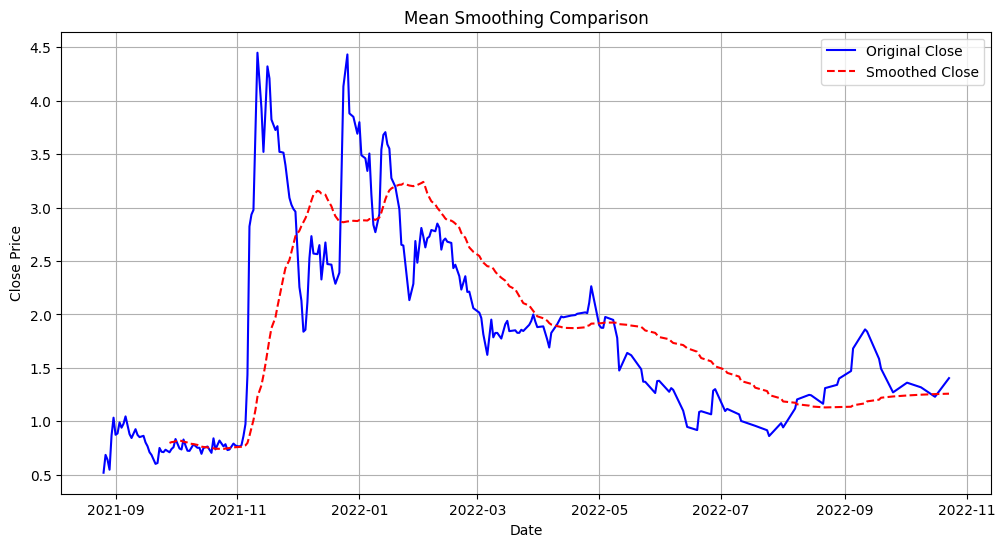

In [2626]:
import pandas as pd
import matplotlib.pyplot as plt

# Define window size for moving average
window_size = 30  # Adjust window size based on your data and smoothing needs

# Apply Mean Smoothing
train_df['smoothed'] = train_df['close'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_df['close'], label='Original Close', color='blue')
plt.plot(train_df.index, train_df['smoothed'], label='Smoothed Close', color='red', linestyle='--')
plt.title('Mean Smoothing Comparison')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [2627]:
train_df['close'] = train_df['smoothed']

In [2628]:
# seasonal_period = 12
# train_df['seasonal_diff'] = train_df['close'] - train_df['close'].shift(seasonal_period)

# # Plotting
# plt.figure(figsize=(12, 6))
# plt.plot(train_df.index, train_df['close'], label='Original Close', color='blue')
# plt.plot(train_df.index, train_df['seasonal_diff'], label='Seasonal Differenced Close', color='red', linestyle='--')
# plt.title('Seasonal Differencing Comparison')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.legend()
# plt.grid(True)
# plt.show()

In [2629]:
# train_df['inverse_scaled'] = scaler.inverse_transform(train_df[['close_scaled']])
# train_df[['close','close_scaled','inverse_scaled']]

In [2630]:
# import matplotlib.pyplot as plt

# # Create a figure and subplots
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# # Plot 'without capping' on the first subplot
# train_df['close'].plot(kind='box', ax=axes[0], title='Without Capping')

# # Plot 'with capping' on the second subplot (replace `data:` with your actual filter)
# train_df.loc[date:, "close"].plot(kind='box', ax=axes[1], title='With Capping')

# # Display the plots side by side
# plt.tight_layout()
# plt.show()


In [2631]:
# import matplotlib.pyplot as plt

# # Create a figure and subplots
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# # Plot 'without capping' on the first subplot
# train_df['close'].plot(kind='kde', ax=axes[0], title='Without Capping')

# # Plot 'with capping' on the second subplot (replace `data:` with your actual filter)
# train_df.loc[date:, "close"].plot(kind='kde', ax=axes[1], title='With Capping')

# # Display the plots side by side
# plt.tight_layout()
# plt.show()


In [2632]:
train_df.loc[:,"close"].skew()

-0.05759692734800806

In [2633]:
# train_df.loc[date:, "close"].skew()

In [2634]:
# train_df = train_df.loc[date:, "close"].to_frame()
# train_df

<Axes: >

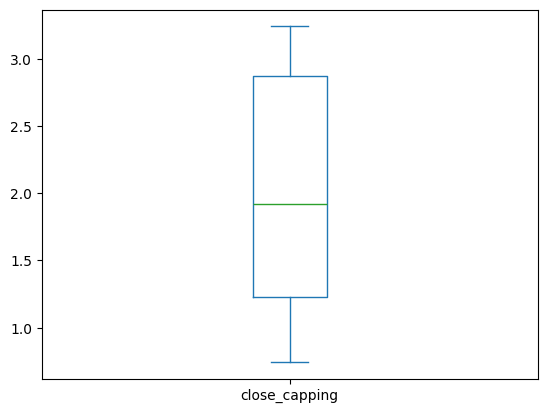

In [2635]:

q1 = train_df['close'].quantile(0.25)
q3 = train_df['close'].quantile(0.75)
IQR = q3-q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

train_df['close_capping'] = np.where(train_df['close']<lower_bound,lower_bound,np.where(train_df['close']>upper_bound,upper_bound,train_df['close'] ))
train_df['close_capping'].plot(kind='box')

In [2636]:
# train_df['close_capping'].plot(kind='kde')

In [2637]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = "yeo-johnson")
x_train = train_df['close_capping'].values
x_train = x_train.reshape(-1, 1)
New_transform_col = pt.fit_transform(x_train)
train_df['yeo-jhonson'] = New_transform_col
# pd.DataFrame( { ‘cols’:x_train.columns , ‘value of lambda’ : pt.lambdas_} )

In [2638]:
# train_df['close_yeo'] = New_transform_col
# train_df['close_capping'].plot(kind='kde')
print(train_df['close_capping'].skew())

-0.05759692734800806


In [2639]:
train_df['close_capping_log1p'] = train_df['close_capping'].apply(np.log1p)

In [2640]:
# train_df['close_capping'].apply(np.log1p).plot(kind='kde')
log_skew = train_df['close_capping_log1p'].skew()
print(log_skew)

-0.35317773814360975


In [2641]:
yeo_jhonson_skew = train_df['yeo-jhonson'].skew()
print(yeo_jhonson_skew)

-0.10944420775124665


In [2642]:
if abs(log_skew) < abs(yeo_jhonson_skew):
    train_df['close'] = train_df['close_capping_log1p']
else:
    train_df['close'] = train_df['yeo-jhonson']

print(train_df['close'].skew())

-0.10944420775124665


In [2643]:
# import plotly.express as px

# # Assuming train_df is your DataFrame with a datetime index
# # Ensure that the index is in datetime format, if not, convert it
# # train_df.index = pd.to_datetime(train_df.index)

# # Calculate the rolling mean
# train_df["close1"] = train_df["close"].rolling(30).mean()

# # Filter the DataFrame for the specified date range
# filtered_df = train_df.loc['2017-06-13':'2022-10-23', ["close", "close1"]]

# # Plot using plotly.express
# fig = px.line(filtered_df, x=filtered_df.index, y=["close", "close1"], labels={"index": "Date", "value": "closed price"})
# fig.update_layout(title="Market Cap and 30-day Rolling Average", xaxis_title="Date", yaxis_title="Market Cap")
# fig.show()

In [2644]:
# train_df.isnull().sum()

In [2645]:

# train_df['close'] = train_df['close_capping_log1p']

In [2646]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply StandardScaler on the 'close' column
train_df['close_scaled'] = scaler.fit_transform(train_df[['close']])

train_df[['close','close_scaled']]
train_df['close'] = train_df['close_scaled']

In [2647]:
# train_df['close'] = train_df['close_capping_log1p']

In [2648]:
# from statsmodels.tsa.stattools import adfuller
# def check_stationary(data:pd.Series()):
#     results = adfuller(data)
#     p = results[1]
    
#     # The result tuple contains the following elements
#     print(f'ADF Statistic: {results[0]}')
#     print(f'P-value: {results[1]}')
    
#     if results[1] < 0.05:
#         print(f"h0 rejected and h1 accepted: The data is stationary")
#     else:
#         print(f"h0 accepted and h1 rejected: The data is non-stationary ")
    
#     print(f'Lags Used ( The number of the lags used in the test): {results[2]}')
#     print(f'Number of Observations: {results[3]}')
#     print(f'Critical values for the test statistic at different significance levels: {results[4]}')

In [2649]:
# check_stationary(train_df['close'].dropna())

In [2650]:
# result = adfuller(train_df['close'])
# #shifting
# train_df['close1'] = train_df['close'] - train_df['close'].shift(1)
# #since we are shifting so ist value will be nan so have to drop that
# train_df['close1'].fillna(train_df['close1'].median(),inplace=True)
# check_stationary(train_df['close1'])

In [2651]:
train_df.isnull().sum()

open                    0
high                    0
low                     0
close                  29
volume                  0
marketCap               0
timestamp               0
crypto_name             0
smoothed               29
close_capping          29
yeo-jhonson            29
close_capping_log1p    29
close_scaled           29
dtype: int64

In [2652]:
train_df.dropna(inplace=True)

In [2653]:
from prophet import Prophet
import numpy as np

In [2654]:
train_df

,open,high,low,close,volume,marketCap,timestamp,crypto_name,smoothed,close_capping,yeo-jhonson,close_capping_log1p,close_scaled
date,,,,,,,,,,,,,
2021-09-28,0.757999,0.777075,0.705835,-1.470375,133104.01,0.000000e+00,2021-09-28T23:59:59.999Z,Toncoin,0.798485,0.798485,-1.470375,0.586944,-1.470375
2021-09-29,0.711928,0.777444,0.709003,-1.460654,147901.81,0.000000e+00,2021-09-29T23:59:59.999Z,Toncoin,0.805870,0.805870,-1.460654,0.591042,-1.460654
2021-09-30,0.741348,0.769739,0.731987,-1.457512,108734.55,0.000000e+00,2021-09-30T23:59:59.999Z,Toncoin,0.808257,0.808257,-1.457512,0.592364,-1.457512
2021-10-01,0.758582,0.839431,0.737719,-1.448989,131340.24,0.000000e+00,2021-10-01T23:59:59.999Z,Toncoin,0.814738,0.814738,-1.448989,0.595941,-1.448989
2021-10-03,0.801208,0.805983,0.722623,-1.440301,114018.18,0.000000e+00,2021-10-03T23:59:59.999Z,Toncoin,0.821349,0.821349,-1.440301,0.599577,-1.440301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-25,1.296813,1.315957,1.262293,-0.909670,12797118.42,1.552691e+09,2022-09-25T23:59:59.999Z,Toncoin,1.232992,1.232992,-0.909670,0.803342,-0.909670
2022-10-02,1.388861,1.398648,1.359998,-0.898105,7769233.86,1.663535e+09,2022-10-02T23:59:59.999Z,Toncoin,1.242129,1.242129,-0.898105,0.807426,-0.898105
2022-10-09,1.348052,1.350494,1.309865,-0.888695,11857176.76,1.610212e+09,2022-10-09T23:59:59.999Z,Toncoin,1.249569,1.249569,-0.888695,0.810738,-0.888695


In [2655]:
train_df = train_df.reset_index()
train_df = train_df[["date","close"]]
train_df.columns = ["ds","y"]
train_df.isnull().sum()

ds    0
y     0
dtype: int64

In [2656]:
# train_df['y'] = [np.log(i) for i in train_df['y']]
# train_df.head()

In [2657]:
print(len(train_df))

212


In [2658]:
model = Prophet()
model.fit(train_df)

14:33:07 - cmdstanpy - INFO - Chain [1] start processing
14:33:07 - cmdstanpy - INFO - Chain [1] done processing


In [2659]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [2660]:
future_dates = model.make_future_dataframe(periods=360)

In [2661]:
future_dates.tail()

,ds
567,2023-10-14
568,2023-10-15
569,2023-10-16
570,2023-10-17
571,2023-10-18


In [2662]:
prediction = model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-28,-0.113562,-1.541418,0.832825,-0.113562,-0.113562,-0.244842,-0.244842,-0.244842,-0.244842,-0.244842,-0.244842,0.0,0.0,0.0,-0.358404
1,2021-09-29,-0.111619,-1.232230,1.192139,-0.111619,-0.111619,0.099339,0.099339,0.099339,0.099339,0.099339,0.099339,0.0,0.0,0.0,-0.012280
2,2021-09-30,-0.109676,-1.285221,1.081619,-0.109676,-0.109676,0.047598,0.047598,0.047598,0.047598,0.047598,0.047598,0.0,0.0,0.0,-0.062077
3,2021-10-01,-0.107732,-0.911368,1.501259,-0.107732,-0.107732,0.399863,0.399863,0.399863,0.399863,0.399863,0.399863,0.0,0.0,0.0,0.292131
4,2021-10-03,-0.103846,-1.627805,0.777490,-0.103846,-0.103846,-0.321539,-0.321539,-0.321539,-0.321539,-0.321539,-0.321539,0.0,0.0,0.0,-0.425385


In [2663]:

plot_plotly(model,prediction)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2021, 9, 28, 0, 0),
                          datetime.datetime(2021, 9, 29, 0, 0),
                          datetime.datetime(2021, 9, 30, 0, 0), ...,
                          datetime.datetime(2022, 10, 9, 0, 0),
                          datetime.datetime(2022, 10, 16, 0, 0),
                          datetime.datetime(2022, 10, 23, 0, 0)], dtype=object),
              'y': array([-1.47037545, -1.46065354, -1.45751228, ..., -0.88869539, -0.88178159,
                          -0.87683171])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2021, 9, 28, 0, 0),
                          datetime.datetime(2021, 9, 29, 0, 0),
                          datetime.datetime(2021, 9, 30, 0, 0), ...,
                          datetime.datetime(2023, 10, 16, 0, 0),
                          datetime.datetime(2023, 10, 17, 0, 0),
                          datetime.datetime(2023, 10, 18, 0, 0)], dtype=object),
              'y': array([-1.54141842, -1.23223041, -1.28522054, ..., -1.16523778, -0.95850755,
                          -0.5646257 ])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2021, 9, 28, 0, 0),
                          datetime.datetime(2021, 9, 29, 0, 0),
                          datetime.datetime(2021, 9, 30, 0, 0), ...,
                          datetime.datetime(2023, 10, 16, 0, 0),
                          datetime.datetime(2023, 10, 17, 0, 0),
                          datetime.datetime(2023, 10, 18, 0, 0)], dtype=object),
              'y': array([-0.35840437, -0.01228023, -0.06207731, ...,  0.04178746,  0.21630854,
                           0.5610384 ])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2021, 9, 28, 0, 0),
                          datetime.datetime(2021, 9, 29, 0, 0),
                          datetime.datetime(2021, 9, 30, 0, 0), ...,
                          datetime.datetime(2023, 10, 16, 0, 0),
                          datetime.datetime(2023, 10, 17, 0, 0),
                          datetime.datetime(2023, 10, 18, 0, 0)], dtype=object),
              'y': array([0.83282499, 1.19213864, 1.08161863, ..., 1.30642638, 1.46726074,
                          1.79184015])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
                         'r

In [2664]:
# model.plot_components(prediction)

In [2665]:
df_cv = cross_validation(model,initial='150 days',period='50 days',horizon='100 days')
df_cv.head()

  0%|          | 0/3 [00:00<?, ?it/s]14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] done processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] done processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:00<00:00, 21.90it/s]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-04-07,1.193551,0.132606,2.243818,-0.079216,2022-04-06
1,2022-04-10,1.357837,0.235562,2.508726,-0.097270,2022-04-06
2,2022-04-12,1.085766,-0.020927,2.143416,-0.106510,2022-04-06
3,2022-04-13,1.326171,0.250197,2.471472,-0.116183,2022-04-06
4,2022-04-17,1.432441,0.353311,2.519552,-0.118971,2022-04-06


In [2666]:
# forecast = df_cv.copy() 

# forecast['yhat'] = np.expm1(forecast['yhat'])
# forecast['yhat'] = scaler.inverse_transform(forecast[['yhat']])

# forecast['yhat_lower'] = np.expm1(forecast['yhat_lower'])
# forecast['yhat_lower'] = scaler.inverse_transform(forecast[['yhat_lower']])

# forecast['yhat_upper'] = np.expm1(forecast['yhat_upper'])
# forecast['yhat_upper'] = scaler.inverse_transform(forecast[['yhat_upper']])

# forecast

In [2667]:


from prophet.diagnostics import cross_validation, performance_metrics

In [2668]:
from prophet import Prophet

import pandas as pd
from sklearn.metrics import r2_score


metrics = performance_metrics(df_cv)
print(metrics)

# Calculate R-squared manually using the cross-validation data
# Note: 'y' is the actual value and 'yhat' is the forecasted value
r2 = r2_score(df_cv['y'], df_cv['yhat'])
print(f"R-squared score: {r2}")


    horizon       mse      rmse       mae      mape     mdape  smape  coverage
0    7 days  1.722736  1.312531  1.305406  8.513159  7.206961    2.0  0.111111
1    9 days  1.802613  1.342614  1.333912  6.928807  6.630375    2.0  0.111111
2   10 days  1.840706  1.356726  1.347575  7.032105  6.630375    2.0  0.111111
3   11 days  1.929194  1.388954  1.378885  7.377905  5.573973    2.0  0.111111
4   12 days  1.855600  1.362204  1.349762  6.611855  5.331369    2.0  0.222222
..      ...       ...       ...       ...       ...       ...    ...       ...
62  93 days  6.563927  2.562016  2.532876  3.605699  4.421697    2.0  0.000000
63  94 days  6.598228  2.568702  2.539224  3.456058  2.633847    2.0  0.000000
64  95 days  6.932980  2.633055  2.600439  3.175049  2.633847    2.0  0.000000
65  96 days  7.631148  2.762453  2.741464  3.419345  2.676001    2.0  0.000000
66 100 days  7.222725  2.687513  2.651923  3.369864  2.676001    2.0  0.000000

[67 rows x 8 columns]
R-squared score: -27.95440812

In [2572]:
import plotly.io as pio
fig = plot_plotly(model,prediction)
# Save the figure as an image (choose the appropriate format)
pio.write_image(fig, f'accuracy_graph/{crypto}.png')

models_df = pd.DataFrame({"name":[crypto] ,"r2_score":[r2]})
models_df

models_df.to_csv("models_score.csv",index=False ,mode='a',header=False)

In [2573]:

import pickle

# Path to save the model
model_path = f'models/{crypto}'

# Save the trained model
with open(f'{model_path}.pkl', 'wb') as f:
    pickle.dump(model, f)

with open(f'{model_path}_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open(f'{model_path}_pt.pkl', 'wb') as f:
    pickle.dump(pt, f)
    

print(f"Model saved as {model_path}")



Model saved as models/NEAR Protocol


In [2574]:
# # Step 7: Make future predictions using the loaded Prophet model
# future = loaded_model.make_future_dataframe(periods=365)  # Example: 365 future days
# forecast = loaded_model.predict(future)

# # Step 8: Reverse the log1p transformation
# forecast['yhat_inv_log'] = np.expm1(forecast['yhat'])

# # Step 9: Reverse the StandardScaler transformation
# forecast['yhat_original'] = loaded_scaler.inverse_transform(forecast[['yhat_inv_log']])

# # Display final prediction in the original scale
# print(forecast[['ds', 'yhat_original']])

In [51]:
mape = np.mean(df_p['mape'])

In [52]:
mdape = np.mean(df_p['mdape'])

In [53]:
smape = np.mean(df_p['smape'])

In [54]:
mse = np.exp(df_p['mse'].mean())

In [55]:
mae = np.exp(df_p['mae'].mean())

In [56]:
rmse = np.exp(df_p['rmse'].mean())

In [57]:
trained_on_rows = len(train_df)

In [59]:
models_df = pd.DataFrame({"name":[crypto] ,"mape":[mape],"mdape":[mdape],"smape":[smape], "mae":[mae],"mse":[mse],"rmse":[rmse],"trained_on_rows":[trained_on_rows]})
models_df

,name,mape,mdape,smape,mae,mse,rmse,trained_on_rows
0,Aave,0.97791,0.690358,0.692641,5.677808e+91,inf,2.197595e+121,547


In [60]:
models_df.to_csv("models_df.csv",index=False,mode='a',header=False)

In [61]:
import pickle

# Path to save the model
model_path = f'models/{crypto}.pkl'

# Save the trained model
with open( model_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Model saved as {model_path}")


Model saved as models/Aave.pkl


In [1739]:

import joblib

# # Assuming you have already trained the model on a DataFrame named train_df
# model = Prophet()
# model.fit(train_df)

# Save the trained model to a file using joblib
joblib.dump(model, f'models/{crypto}.joblib')


['models/Stellar.joblib']

In [1741]:
models_df = pd.read_csv('models_df.csv')

In [1749]:
models_df[models_df['name'] == crypto].reset_index()['smape'][0]

1.171902326

In [162]:
import numpy as np

def r_squared(y_true, y_pred):

    mean_actual = np.mean(y_true)
    total_sum_of_squares = np.sum((y_true - mean_actual) ** 2)
    sum_of_squared_residuals = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (sum_of_squared_residuals / total_sum_of_squares)
    return r2

actual_values = df_cv["y"].values
predicted_values =  df_cv["yhat"].values

r2_value = r_squared(actual_values, predicted_values)
print("R-squared:", r2_value)


R-squared: -0.8035325250298031


In [2674]:
score_df = pd.read_csv('models_score.csv')
score_df = score_df.sort_values(by="r2_score",ascending=False)

In [2675]:
score_df.to_csv("models_accuracy_final.csv",index=False)